# Erwan LeCun
#Group Members: Erwan LeCun, Anita Ahmed, Miyabi Ishihara
# PUI HW 3 Assignment 3

#####We tested to see whether, in any given month, subscribers and customers of Citibike ride their bikes for comparable amounts of time. Our idea was that there could be a lot of variability within the trip duration of the two user types because of the kind of trips that subscribers would make versus the types of trips that customers would make.

#####The Null Hypothesis for our z-test is that the mean trip duration of subscribers will be about the same as the mean trip duration of customers.

#####Ho: u1 - u2 = 0

#####The Alternate Hypothesis is that the mean trip duration of subscribers is statistically different than the mean trip duration of customers.

#####H1: u1 - u2 ≠ 0

#####Our confidence level will be 0.05.

#####α = 0.05

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
import os
import json
from zipfile import ZipFile
from StringIO import StringIO
import urllib2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# read in the zip file from the citibike website
r = urllib2.urlopen("https://s3.amazonaws.com/tripdata/201501-citibike-tripdata.zip").read()
file = ZipFile(StringIO(r))
citibike_csv = file.open("201501-citibike-tripdata.csv")
df = pd.read_csv(citibike_csv)

In [3]:
# iterate through the dataframe to extract our data
trip_subscriber = []
trip_customer = []

for index, row in df.iterrows():
        if row['usertype'] == 'Subscriber':
                trip_subscriber.append(row['tripduration'])
        elif row['usertype'] == 'Customer':
                trip_customer.append(row['tripduration'])

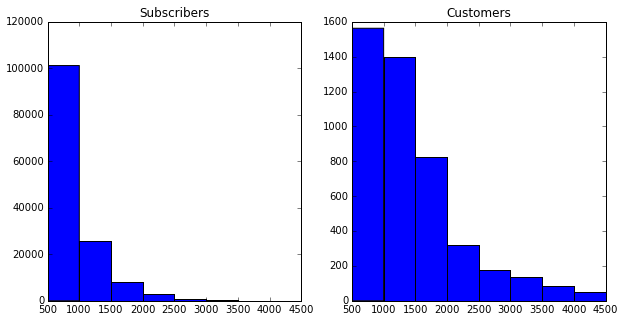

In [4]:
# plot the distributions of subscribers vs customers
bins = range(500, 5000, 500)
trip_subscriber = np.array(trip_subscriber)
trip_customer = np.array(trip_customer)
fig = pl.figure(figsize = [10,5])
ax1 = fig.add_subplot(121)
ax1.hist(trip_subscriber, bins = bins)
ax1.set_title('Subscribers')
ax2 = fig.add_subplot(122)
ax2.hist(trip_customer, bins = bins)
ax2.set_title('Customers')

#####From these plots, we can already tell that there is a noticeable difference between the distributions of the two user types.

In [5]:
# conduct z-test
z_test = lambda x1, x2, u1, u2, o1, o2, n1, n2: ((x1 - x2) - (u1 - u2)) / np.sqrt((o1 / n1) + (o2 / n2))
z_sample = z_test(np.average(trip_customer), np.average(trip_subscriber), 0, 0, np.var(trip_customer), np.var(trip_subscriber), len(trip_customer), len(trip_subscriber))
print z_sample

33.7877558335


#####With a z-score of 33.7877, we can reject the null hypothesis that the mean of subscriber trip duration and the mean of customer trip duration are the same.

#####The z-score was very large, since the sample sizes of subscriber sample size is significantly larger than the customer sample size. So, we decided to conduct the K-S test to see if the two distributions come from the same parent distribution. Used used a significance level of 0.05.

In [6]:
# conduct ks test
ks = scipy.stats.ks_2samp(trip_subscriber, trip_customer)
print ks

(0.46182684553824527, 0.0)


#####With a p-value of 0.0, we can reject the null hypothesis that the subscriber data and the customer data come from the same distribution.

#####Subscribers and customers have largely different trip durations. Our initial thought is that this is true because subscribers are more likely to be local residents who use their bikes for short commutes, while customers are more likely to be tourists who use bikes for long, scenic rides around the city.